<a href="https://colab.research.google.com/github/Vynn0/DAA/blob/main/DAA_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dynamic Programming - Deret Fibonacci

In [ ]:
nterms = int(input("How many terms? "))
n1, n2 = 0, 1
count = 0

if nterms <= 0:
  print("Please enter a positive integer: ")
elif nterms == 1:
  print("Fibonacci sequence upto ", nterms, ":")
  print(n1)
else:
  print("Fibonacci sequence: ")
  while count < nterms:
    print(n1)
    n1, n2 = n2, n1+n2
    count += 1

In [ ]:
def recur_fibo(n):
  if n<= 1:
    return n
  else:
    return(recur_fibo(n-1) + recur_fibo(n-2))

nterms = 20

if nterms <= 0:
  print("Please enter a positive integer")
else:
  print("Fibonacci sequence: ")
  for i in range(nterms):
    print(recur_fibo(1))

## The Traveling Salesperson Problem

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import itertools

def exact_TSP(cities):
  return shortest(alltours(cities))

def shortest(tours):
  return min(tours, key=total_distance)

# Tours
alltours = itertools.permutations # The permutation funciton is already defined in the itertools module

cities = {1,2,3}

list(alltours(cities))

500.0

In [ ]:
def total_distance(tour):
  return sum(distance(tour[i], tour[i-1]) for i in range (len(tour)))

City = complex

def distance(A, B):
  return abs(A-B)

A = City(300, 0)
B = City(0, 400)
# √300^2 + (-400)^2 = 500
distance(A, B)

In [ ]:
def Cities(n):
  return set(City(random.randrange(10, 890), random.randrange(10, 590)) for c in range(n))

# Let's make some standard sets of cities of various sizes.
# We'll set the random seed so that these sets are the same every time we run this notebook.
random.seed('seed')
cities8, cities10, cities100, cities1000 = Cities(8), Cities(10), Cities(100), Cities(1000)

cities8

In [22]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

((551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j))
1990.388372313552


In [ ]:
def alltours(cities):
  "Return a list of tours, each a permutation of cities, but each one starting with the same city."
  start = first(cities)
  return [[start] + list(tour)
    for tour in itertools.permutations(cities-{start})]
def first(collection):
  "Start iterating over collection, and return the first element."
  for x in collection: return x

alltours({1, 2, 3})
alltours({1, 2, 3, 4})

In [31]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

[(551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j)]
1990.388372313552


## Plotting

Looking at a long list of numbers is not very enlightening; if we could plot a tour we'd understand it better. I define plot_tour(algorithm, cities) to apply a TSP algorithm to a set of cities, plot the resulting tour, and print information about the total distance of the tour and the time it took to find it. The plot will have each city as a blue circle, except the starting point will be a red square:

In [ ]:
import time

def plot_tour(algorithm, cities):
  "Apply a TSP algorithm to cities, and plot the resulting tour."
  # Find the solution and time how long it takes
  t0 = time.time()
  tour = algorithm(cities)
  t1 = time.time()
  # Plot the tour as blue lines between blue circles, and the starting city as a red square.
  plotline(list(tour) + [tour[0]])
  plotline([tour[0]], 'rs')
  plt.show()
  print("{} city tour; total distance = {:.1f}; time = {:.3f} secs for {}".format(len(tour), total_distance(tour), t1-t0, algorithm.__name__))

def plotline(points, style='bo-'):
  "Plot a list of points (complex numbers) in the 2-D plane."
  X, Y = XY(points)
  plt.plot(X, Y, style)

def XY(points):
  "Given a list of points, return two lists: X coordinates, and Y coordinates."
  return [p.real for p in points], [p.imag for p in points]

plot_tour(exact_TSP, cities8)

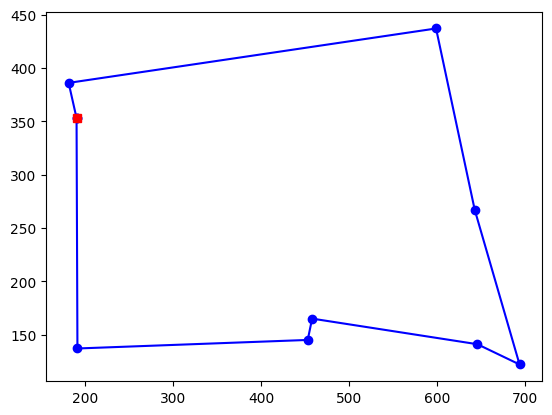

9 city tour; total distance = 1524.5; time = 0.154 secs for exact_TSP


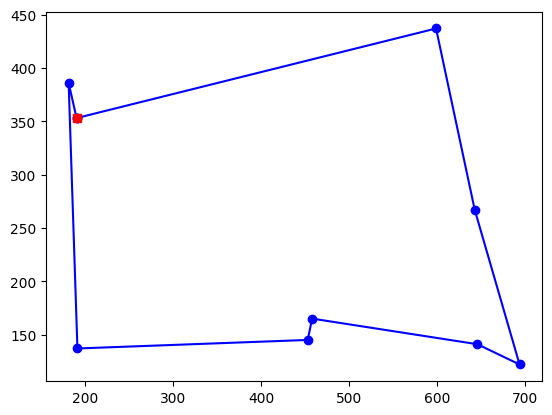

9 city tour; total distance = 1554.1; time = 0.000 secs for greedy_TSP


In [37]:
# Greedy Nearest Neighbor (greedy_TSP)

def greedy_TSP(cities):
  "At each step, visit the nearest neighbor that is still unvisited."
  start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour

def nearest_neighbor(A, cities):
  "Find the city in cities that is nearest to city A"
  return min(cities, key=lambda x: distance(x, A))

cities = Cities(9)
plot_tour(exact_TSP, cities)
plot_tour(greedy_TSP, cities)

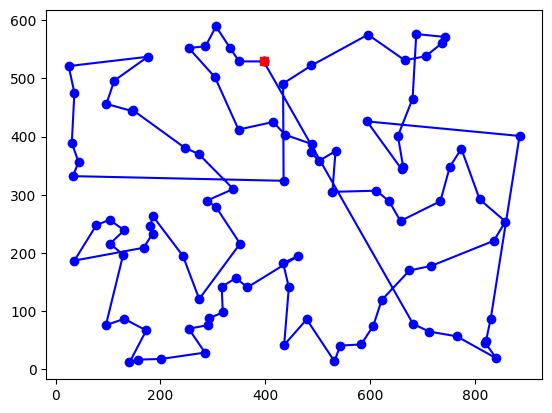

100 city tour; total distance = 6987.7; time = 0.001 secs for greedy_TSP


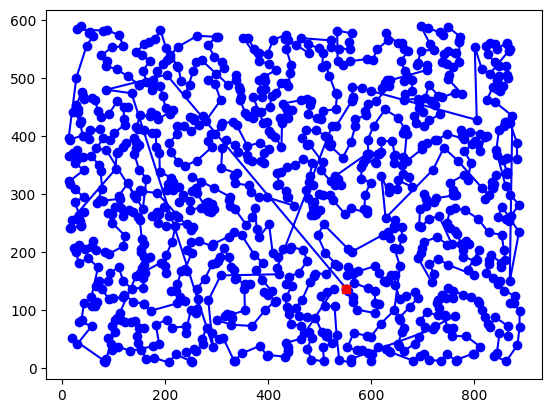

1000 city tour; total distance = 20529.4; time = 0.137 secs for greedy_TSP


In [38]:
plot_tour(greedy_TSP, cities100)
plot_tour(greedy_TSP, cities1000)

### Algorithm 2 : Greedy Nearest Neighbor

In [ ]:
def greedy_TSP(cities):
  "At each step, visit the nearest neighbor that is still unvisited."
  start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour

def nearest_neighbor(A, cities):
  "Find the city in cities that is nearest to city A"
  return min(cities, key=lambda x: distance(x, A))

### Algorithm 3: Greedy Nearest Neighbor from All Starting Points (all_greedy_TSP)

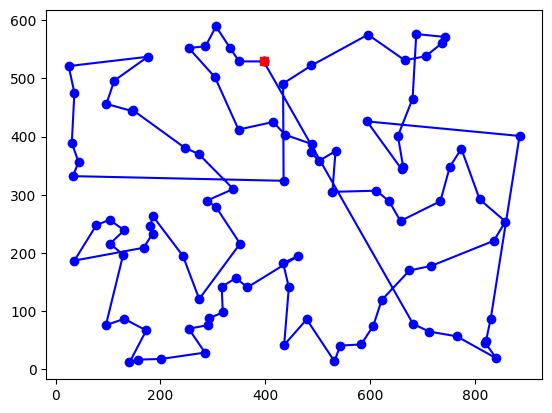

100 city tour; total distance = 6987.7; time = 0.004 secs for greedy_TSP


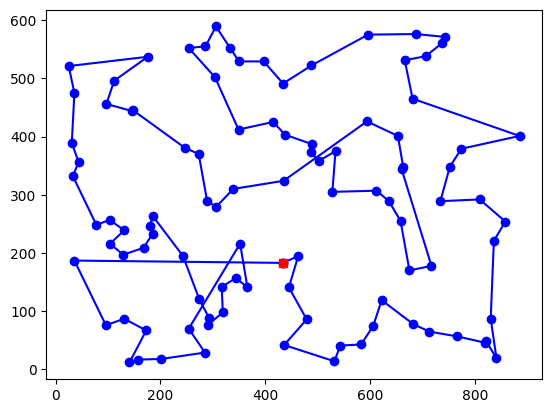

100 city tour; total distance = 6213.5; time = 0.148 secs for all_greedy_TSP


In [45]:
#Greedy Nearest Neighbor (greedy_TSP)

def all_greedy_TSP(cities):
  "Try the greedy algorithm from each of the starting cities; return the shortest tour."
  return shortest(greedy_TSP(cities, start=c) for c in cities)

def greedy_TSP(cities, start=None):
  "At each step, visit the nearest neighbor that is still unvisited"
  if start is None: start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour

plot_tour(greedy_TSP, cities100)
plot_tour(all_greedy_TSP, cities100)

## Algorithm 4: Greedy Nearest Neighbor with Exact End (greedy_exact_end_TSP)

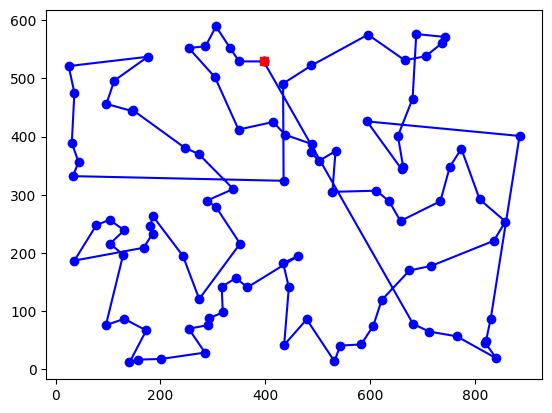

100 city tour; total distance = 6987.7; time = 0.185 secs for greedy_exact_end_TSP


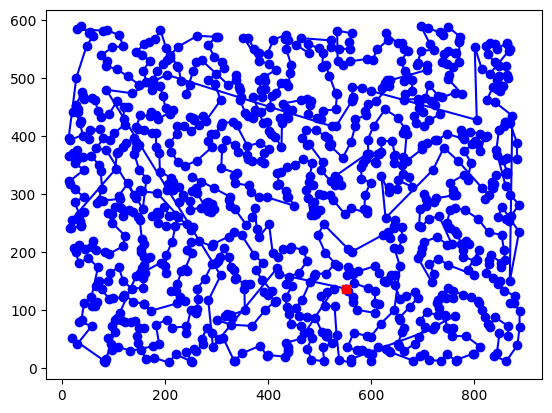

1000 city tour; total distance = 20171.0; time = 0.287 secs for greedy_exact_end_TSP


In [49]:
# Algorithm 4: Greedy Nearest Neighbor with Exact End (greedy_exact_end_TSP)
def greedy_exact_end_TSP(cities, start=None, end_size=8):
  """At each step, visit the nearest neighbor that is still unvisited until
  there are k_end cities left; then choose the best of all possible endings."""
  if start is None: start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  # Use greedy algorithm for all but the last end_size cities
  while len(unvisited) > end_size:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  # Consider all permutations of possible ends to the tour, and choose the best one.
  # (But to make things faster, omit the middle of the tour.)
  ends = map(list, itertools.permutations(unvisited))
  best = shortest([tour[0], tour[-1]] + end for end in ends)
  return tour + best[2:]

plot_tour(greedy_exact_end_TSP, cities100)
plot_tour(greedy_exact_end_TSP, cities1000)

### Algorithm 5: Greedy Nearest Neighbor with Both Ends Search(greedy_bi_TSP)

<ipython-input-50-bee5d789d4e4>:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  starts = random.sample(cities, min(len(cities), start_size))


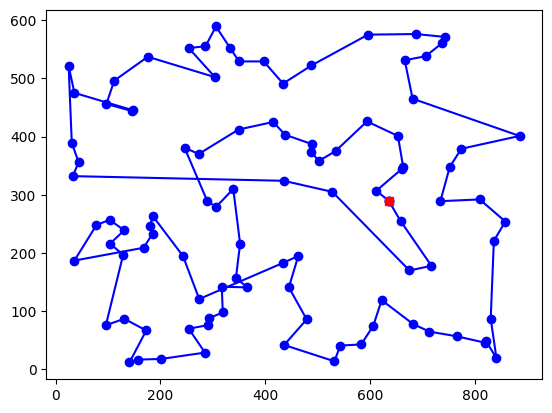

100 city tour; total distance = 6230.0; time = 0.051 secs for greedy_bi_TSP


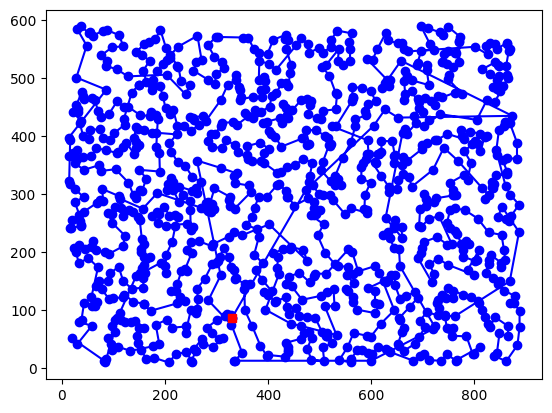

1000 city tour; total distance = 20070.7; time = 1.608 secs for greedy_bi_TSP


In [50]:
# Algorithm 5: Greedy Nearest Neighbor with Both Ends search(greedy_bi_TSP)

def greedy_bi_TSP(cities, start_size=12, end_size=6):
  "At each step, visit the nearest neighbor that is still unvisited."
  starts = random.sample(cities, min(len(cities), start_size))
  return shortest(greedy_exact_end_TSP(cities, start, end_size) for start in starts)

random.seed('bi')
plot_tour(greedy_bi_TSP, cities100)
plot_tour(greedy_bi_TSP, cities1000)

## Benchmarking Algorithms

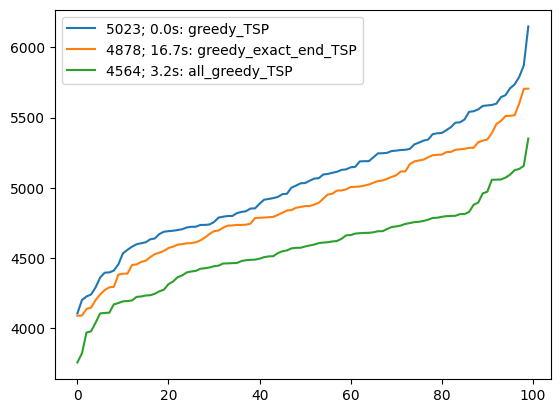

100 x 50=cit maps


In [53]:
# Benchmarking Algorithms
def compare_algorithms(algorithms, maps):
  "Apply each algorithm to each map and plot results."
  for algorithm in algorithms:
    t0 = time.time()
    results = [total_distance(algorithm(m)) for m in maps]
    t1 = time.time()
    avg = sum(results) / len(results)
    label = '{:.0f}; {:.1f}s: {}'.format(avg, t1-t0, algorithm.__name__)
    plt.plot(sorted(results), label=label)
  plt.legend(loc=2)
  plt.show()
  print('{} x {}=cit maps'.format(len(maps), len(maps[0])))

def Maps(M, N):
  "Return a list of M maps, each consisting of a set of N cities."
  return [Cities(N) for m in range(M)]

compare_algorithms([greedy_TSP, greedy_exact_end_TSP, all_greedy_TSP], Maps(100,50))

## Algoritma Greedy: Huffman Coding

Huffman coding adalah sebuah tipe code yang optimal yang biasanya digunakan untuk lossless data compression.

In [ ]:
string = 'BCAADDDCCACACAC'

class NodeTree(object):
  def __init__(self, left=None, right=None):
    self.left = left
    self.right = right

  def children(self):
    return (self.left, self.right)

  def nodes(self):
    return (self.left, self.right)

  def __str__(self):
    return '%s_%s' % (self.left, self.right)


## Huffman Tree Node

In [57]:
import heapq

class node:
  def __init__(self, freq, symbol, left=None, right=None):
    # Frequency of symbol
    self.freq = freq

    # Symbol name (Character)
    self.symbol = symbol

    # Node left of current node
    self.left = left

    # Node right of current node
    self.right = right

    # Tree direction (0/1)
    self.huff = ''

  def __lt__(self, nxt):
    return self.freq < nxt.freq

    # Utility function to print huffman
    # Codes for all symbols in the newly created Huffman tree
def printNodes(node, val=''):
  # Huffman code for current node
  newVal = val + str(node.huff)

  # If node is not an edge node, then traverse inside it

  if(node.left):
    printNodes(node.left, newVal)
  if(node.right):
    printNodes(node.right, newVal)

    # If node is edge node, then display its huffman code
  if(not node.left and not node.right):
    print(f"{node.symbol} -> {newVal}")

# Chracters for huffman tree
chars = ['a', 'b', 'c', 'd', 'e', 'f']

# Frequency of characters
freq = [5, 9, 12, 13, 16, 45]

# List containing unused nodes
nodes = []

# Converting characters and frequencies into huffman tree nodes

for x in range(len(chars)):
  heapq.heappush(nodes, node(freq[x], chars[x]))

while len(nodes) > 1:

  # Sort all the nodes in ascending order based on their frequency

  left = heapq.heappop(nodes)
  right = heapq.heappop(nodes)

  # Assign directional value to these nodes
  left.huff = 0
  right.huff = 1

  # Combine the 2 smallest nodes to create new node as their parent

  newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right)
  heapq.heappush(nodes, newNode)

# huffman Tree is ready!
printNodes(nodes[0])

f -> 0
c -> 100
d -> 101
a -> 1100
b -> 1101
e -> 111
